___
# Atividade: Teste de hipóteses para média populacional 
___

## Aula 24


<div id="indice"></div>

## Índice

- [Teste de hipóteses para média populacional com variância populacional desconhecida](#th-var-desconhecida)
    - [Passos para construção de um teste de hipóteses](#passos)
    - [Decisão do teste](#decisao)
        - [Caso Unilateral a Esquerda](#unilateral-esquerda)
        - [Caso Unilateral a Direita](#unilateral-direita)
        - [Caso Bilateral](#bilateral)
    - [Exemplos](#exemplos)
        - [Exemplo 1: Pontuação em um exame de inglês](#exemplo1)
        - [Exemplo 2: Conteúdo de latas de refrigerante](#exemplo2)
        
<p>

- [Exercício: Precipitação Pluviométrica](#base)
    - [item (a)](#a)
    - [item (b)](#b)
    - [item (c)](#c)
    - [item (d)](#d)

<p>
    
- [Estimando o tamanho da amostra](#estimando-n)
    - [Exercício](#calc_n)
___

In [55]:
import scipy.stats as stats
from scipy.stats import t, norm, probplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, ceil
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

___
<div id="th-var-desconhecida"></div>

# Teste de hipóteses para média populacional com variância populacional desconhecida

Quando não conhecemos a variância populacional não é possível realizar o teste de hipóteses utilizando o TLC. Assim, precisamos de uma nova estatística de teste. **Importante**: para esta estatística vamos considerar apenas variáveis de interesse com distribuição **normal**.

Supondo que uma amostra aleatória simples foi coletada da população, podemos utilizar o estimador $S^2$ (variância amostra - calculada a partir de uma amostra) para $\sigma^2$ (variância populacional - desconhecida), obtemos, sob $H_0$, que:

$$t = \frac{\overline{X}-\mu_0}{S/\sqrt{n}}\sim t_{(n-1)}$$

sendo $(n-1)$ os graus de liberdade da distribuição t-Student do teste.

___
<div id="passos"></div>

## Passos para construção de um teste de hipóteses

1. Fixe qual a hipótese nula, $H_0$, a ser testada e qual a hipótese alternativa ($H_A$).
2. Use a teoria estatística e as informações disponíveis para decidir qual **estatística de teste** será usada sob $H_0$. Não se esqueça de levantar as propriedades dessa estatística.
3. Utilize a estatística para rejeitar, ou não, $H_0$. Para isso temos duas opções:
    * **Via Região Crítica:**
        1. **Fixe a probabilidade $\alpha$** de cometer erro de rejeitar $H_0$, sob $H_0$ verdadeiro, e use este valor para **construir a região crítica RC**. Lembre que esta região é construída para a estatística definida no segundo passo, usando o valor hipotetizado em $H_0$.
        2. Use as informações fornecidas pela amostra para encontrar o **valor observado da estatística de teste**. 
        3. Se o **valor observado da estatística de teste pertencer à região crítica, rejeite $H_0$**; caso contrário, não rejeite.
    * **Via valor-p:**
        1. Use as informações fornecidas pela amostra para encontrar o **valor observado da estatística de teste**. 
        2. Use o valor observado da *estatística de teste* para **encontrar o valor-p**, ou seja, a probabilidade de encontrar valores tão ou mais desfavoráveis à $H_0$ quanto a *estatística de teste* observada pela amostra. 
        3. Se o **valor-p for menor do que algum $\alpha$ fixado, rejeite $H_0$**; caso contrário, não rejeite.

[Voltar ao índice](#indice)

___
<div id="decisao"></div>

## Decisão do teste

Vamos considerar a estatística do teste observada (sob $H_0$): 

$$t_{obs} = \frac{\overline{x}-\mu_0}{s/\sqrt{n}}$$

<div id="unilateral-esquerda"></div>

### Caso Unilateral a Esquerda

$\quad$ No caso em que a hipótese alternativa está exclusivamente à esquerda da média, ou seja,

$$H_0: \mu = \mu_0$$
$$H_A: \mu < \mu_0$$

 * **Via Região Crítica**: Obtemos o valor crítico como: $t_c = \text{stats.t.ppf}(\alpha , \text{df}=n-1)$, pois $\alpha = P(erro~I)$ estará na cauda à esquerda. Assim, rejeitamos $H_0$, ao nível de significância $\alpha$, se $t_{obs} < t_c$.

 * **Via valor-p**: É razoável rejeitar $H_0$ se a média amostral observada $(\overline{x})$ for muito menor que $\mu_0$, ou seja, se $t_{obs}$ for "muito" negativo. Define-se o valor-p em um teste unilateral a esquerda por: $valor\_p = P(t_{(n-1)} < t_{obs} | \mu=\mu_0) = \text{stats.t.cdf}(t_{obs}, \text{df}=n-1)$.

<div id="unilateral-direita"></div>

### Caso Unilateral a Direita

$\quad$ No caso em que a hipótese alternativa está exclusivamente à direita da média, ou seja,

$$H_0: \mu = \mu_0$$
$$H_A: \mu > \mu_0$$

 * **Via Região Crítica**: Obtemos o valor crítico como: $t_c = \text{stats.t.ppf}(1-\alpha, \text{df}=n-1)$, pois $\alpha = P(erro~I)$ estará na cauda à direita. Assim, rejeitamos $H_0$, ao nível de significância $\alpha$, se $t_{obs} > t_c$.

 * **Via valor-p**: É razoável rejeitar $H_0$ se a média amostral observada $(\overline{x})$ for muito maior que $\mu_0$, ou seja, se $t_{obs}$ for "muito" positivo. Define-se o valor-p em um teste unilateral a esquerda por: $valor\_p = P(t_{(n-1)} > t_{obs} | \mu=\mu_0) = 1 - \text{stats.t.cdf}(t_{obs}, \text{df}=n-1)$.

<div id="bilateral"></div>

### Caso Bilateral

$\quad$ No caso em que a hipótese alternativa é diferente da média, ou seja,

$$H_0: \mu = \mu_0$$
$$H_A: \mu \neq \mu_0$$

 * **Via Região Crítica**: Obtemos o valor crítico como: $t_c = \text{stats.t.ppf}(1-\alpha/2, df=n-1)$, pois temos $\alpha/2$ em cada cauda. Assim, rejeitamos $H_0$, ao nível de significância $\alpha$, se $t_{obs} < -t_c$ ou $t_{obs} > t_c$.

 * **Via valor-p**: É razoável rejeitar $H_0$ se a média amostral observada $(\overline{x})$ for muito menor ou muito maior que $\mu_0$, ou seja, se $t_{obs}$ for "muito" negativo ou "muito" positivo. Define-se o valor-p em um teste bilateral por: $valor\_p = 2p'$, onde

<pp>
    
**Atenção:**
 1. Se $\overline{x} < \mu_0$: $p' = P(t_{(n-1)} < t_{obs} | \mu=\mu_0) = \text{stats.t.cdf}(t_{obs}, \text{df}=n-1)$.
 2. Se $\overline{x} > \mu_0$: $p' = P(t_{(n-1)} > t_{obs} | \mu=\mu_0) = 1 - \text{stats.t.cdf}(t_{obs}, \text{df}=n-1)$.

### Teoria Geral:
  * erro tipo I: concluir por rejeitar $H_0$ quando $H_0$ é verdadeira
  * erro tipo II: concluir por não rejeitar $H_0$ quando $H_0$ é falsa (ou dizer, rejeitar $H_A$ quando $H_A$ é verdadeira)

[Voltar ao índice](#indice)

___
<div id="exemplos"></div>

## Exemplos

Vamos apresentar dois exemplos de teste de hipótese para média populacional com variância desconhecida.

___

<div id="exemplo1"></div>

# Exemplo 1: Pontuação em um exame de inglês

O número médio de pontos em um exame de inglês tem sido historicamente igual a 80. Foram sorteados 10 estudantes que fizeram recentemente esse exame e observadas as notas: 65, 70, 76, 86, 59, 81, 75, 72, 81, 83.

Especialistas desconfiam que o rendimento médio dos alunos diminuiu e desejam testar essa afirmação por meio de um teste de hipóteses, com nível de significância de 5%. Fazendo as suposições necessárias, qual seria a conclusão do teste?

## Resposta:

### Definição da variável de interesse

 * $X$: número de pontos que um estudante tira em um exame de inglês.

 * Aqui, $E(X)=\mu \mbox{ e } Var(X)=\sigma^2$, 
 sendo ambos desconhecidos pelo contexto do problema!

### Hipóteses em termos do problema e em termos estatísticos

 * $H_0:$ Desconfiança não procede $\Rightarrow H_0: \mu=80$

 * $H_1:$ Desconfiança procede que rendimento médio caiu $\Rightarrow H_1: \mu<80$


### Inicializando com a amostra e suas estimativas (com uso do `numpy`):

In [56]:
# Conjunto de Dados
amostra = [65,70,76,86,59,81,75,72,81,83]

n = len(amostra)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
xbarra = np.mean(amostra)
s = np.std(amostra, ddof=1)

print(f'Tamanho da amostral: n={n:.0f} \n'
      f'Média amostral observada (estimativa para mu): xbarra={xbarra:.5f} \n'
      f'Desvio padrão amostral (estimativa de sigma): s={s:.5f}')

Tamanho da amostral: n=10 
Média amostral observada (estimativa para mu): xbarra=74.80000 
Desvio padrão amostral (estimativa de sigma): s=8.48266


### Inicializando com a amostra e suas estimativas (com uso do `pandas`):

In [57]:
# Conjunto de Dados
amostra = pd.Series([65,70,76,86,59,81,75,72,81,83])

n = len(amostra)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
xbarra = amostra.mean()
s = amostra.std()

print(f'Tamanho da amostral: n={n:.0f} \n'
      f'Média amostral observada (estimativa para mu): xbarra={xbarra:.5f} \n'
      f'Desvio padrão amostral (estimativa de sigma): s={s:.5f}')

Tamanho da amostral: n=10 
Média amostral observada (estimativa para mu): xbarra=74.80000 
Desvio padrão amostral (estimativa de sigma): s=8.48266


In [58]:
# Valores de acordo com enunciado
𝛼 = 0.05 #nível de significância fixado para o teste
μ0 = 80 #sob a hipótese nula

### Decisão via Região Crítica: UNICAUDAL a esquerda

In [59]:
# Decisão Via Região Crítica: UNICAUDAL a esquerda

t_obs = (xbarra-μ0)/(s/np.sqrt(n))

t_c = stats.t.ppf(𝛼, df=n-1) #valor crítico na cauda a esquerda

print(f't_obs = {t_obs:.5f} \n'
      f't_c = {t_c:.5f} \n\n'
      f'Regra geral: Rejeitamos a hipótese nula H0 se t_obs pertencer a Região Crítica (RC)!! \n'
      f'RC=t_obs < {t_c:.5f} \n\n'
      f'Conclusão: Como t_obs= {t_obs:.5f} pertence a RC, \n'
      f'    então há evidências de que desconfiança procede, com {𝛼*100:.0f}% de significância!!')


t_obs = -1.93852 
t_c = -1.83311 

Regra geral: Rejeitamos a hipótese nula H0 se t_obs pertencer a Região Crítica (RC)!! 
RC=t_obs < -1.83311 

Conclusão: Como t_obs= -1.93852 pertence a RC, 
    então há evidências de que desconfiança procede, com 5% de significância!!


### Decisão via Valor-p: UNICAUDAL a esquerda

In [60]:
#Decisão Via Valor-p: UNICAUDAL a esquerda
t_ob = (xbarra-μ0)/(s/np.sqrt(n))

valor_p = stats.t.cdf(t_obs, df=n-1) 

print(f'𝛼 = {𝛼:.5f} \n'
      f'valor-p = {valor_p:.5f} \n\n'
      f'Regra geral: Rejeitamos a hipótese nula H0 se valor-p < 𝛼!! \n\n'
      f'Conclusão: Conclusão: Como nos resultados acima vemos que valor-p = {valor_p:.5f} < 𝛼, \n' 
      f'    então há evidências de que desconfiança procede, com {𝛼*100:.0f}% de significância!!')


𝛼 = 0.05000 
valor-p = 0.04225 

Regra geral: Rejeitamos a hipótese nula H0 se valor-p < 𝛼!! 

Conclusão: Conclusão: Como nos resultados acima vemos que valor-p = 0.04225 < 𝛼, 
    então há evidências de que desconfiança procede, com 5% de significância!!


[Voltar ao índice](#indice)

___

<div id="exemplo2"></div>

# Exemplo 2: Conteúdo de latas de regrigerante

As latas de certa marca de refrigerante apresentam em seu rótulo o volume de 350 ml. O fabricante deseja testar se o conteúdo médio das latas é igual a 350 ml, como anunciado no rótulo. Isto equivale a verificar se a máquina está regulada para colocar 350 ml, ou não, nas latas. 

Para averiguar a afirmação do fabricante, foi coletada uma amostra de 36 latas do refrigerante em pontos de comercialização e mediu-se o conteúdo destas latas. Os resultados obtidos na amostra foram: $\overline{x} = 347~\text{ml}$ e $s = 10,5~\text{ml}$

Será que as latas contêm 350 ml de líquido com 95% de confiança?

## Resposta:

### Definição da variável de interesse

 * $X$: quantidade de refrigerante dentro de uma lata.

 * Aqui, $E(X)=\mu \mbox{ e } Var(X)=\sigma^2$, 
 sendo ambos desconhecidos pelo contexto do problema!

### Hipóteses em termos do problema e em termos estatísticos

 * $H_0:$ Máquina está regulada $\Rightarrow H_0: \mu=350$

 * $H_1:$ Máquina não está regulada $\Rightarrow H_1: \mu\neq350$


### Inicializando com as estimativas a partir do enunciado:

In [61]:
# Conjunto de Dados
n = 36                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
xbarra = 347
s = 10.5

print(f'Tamanho da amostral: n={n:.0f} \n'
      f'Média amostral observada (estimativa para mu): xbarra={xbarra:.5f} \n'
      f'Desvio padrão amostral (estimativa de sigma): s={s:.5f}')

Tamanho da amostral: n=36 
Média amostral observada (estimativa para mu): xbarra=347.00000 
Desvio padrão amostral (estimativa de sigma): s=10.50000


In [62]:
# Valores de acordo com enunciado
𝛼 = 0.05 #nível de significância fixado para o teste
μ0 = 350 #sob a hipótese nula

### Decisão via Região Crítica: BICAUDAL

In [63]:
#Decisão Via Região Crítica: BICAUDAL

t_obs = (xbarra-μ0)/(s/np.sqrt(n))

t_c = stats.t.ppf(1-𝛼/2, df=n-1) #valor crítico na cauda a direita (bicaudal)

print(f't_obs = {t_obs:.5f} \n'
      f't_c = {t_c:.5f} e -t_c = {t_c:.5f} \n\n'
      f'Regra geral: Rejeitamos a hipótese nula H0 se t_obs pertencer a Região Crítica (RC)!! \n'
      f'RC=t_obs < {-t_c:.5f} ou t_obs > {t_c:.5f} \n\n'
      f'Conclusão: Como t_obs= {t_obs:.5f} NÃO pertence à RC, \n'
      f'    então não há evidências de que máquina esteja desregulada, com {𝛼*100:.0f}% de significância!!')



t_obs = -1.71429 
t_c = 2.03011 e -t_c = 2.03011 

Regra geral: Rejeitamos a hipótese nula H0 se t_obs pertencer a Região Crítica (RC)!! 
RC=t_obs < -2.03011 ou t_obs > 2.03011 

Conclusão: Como t_obs= -1.71429 NÃO pertence à RC, 
    então não há evidências de que máquina esteja desregulada, com 5% de significância!!


### Decisão via Valor-p: BICAUDAL

In [64]:
#Decisão Via Valor-p: BICAUDAL

t_ob = (xbarra-μ0)/(s/np.sqrt(n))

valor_p = 2*stats.t.cdf(t_obs, df=n-1)  #já que média amostral xbarra é menor do que μ0

print(f'𝛼 = {𝛼:.5f} \n'
      f'valor-p = {valor_p:.5f} \n\n'
      f'Regra geral: Rejeitamos a hipótese nula H0 se valor-p < 𝛼!! \n\n'
      f'Conclusão: Conclusão: Como nos resultados acima vemos que valor-p = {valor_p:.5f} > 𝛼, \n' 
      f'    então NÃO há evidências de que máquina esteja desregulada, com {𝛼*100:.0f}% de significância!!')



𝛼 = 0.05000 
valor-p = 0.09532 

Regra geral: Rejeitamos a hipótese nula H0 se valor-p < 𝛼!! 

Conclusão: Conclusão: Como nos resultados acima vemos que valor-p = 0.09532 > 𝛼, 
    então NÃO há evidências de que máquina esteja desregulada, com 5% de significância!!


[Voltar ao índice](#indice)

___

<div id="base"></div>

# Exercício: Precipitação Pluviométrica

Montgomery – Adaptado do Exercício 9-34

Semear nuvens tem sido estudado durante muitas décadas como um procedimento de mudança do tempo (veja referência da pesquisa no livro). Algumas nuvens foram selecionadas aleatoriamente e semeadas com nitrato de prata. A precipitação pluviométrica, em acre-pé, foi medida e registrada no arquivo `precipitacao.csv`.

Suspeita-se que a precipitação média das nuvens semeadas excede 25 acres-pés.

In [65]:
# Carregando os dados
dados = pd.read_csv('precipitacao.csv', header=None)
dados.columns = ['precipitacao']
precipitacao = dados['precipitacao']

dados.head()

,precipitacao
0,18.0
1,30.7
2,19.8
3,27.1
4,22.3


___
<div id="a"></div>

### (a)

Formule as hipóteses em termos do problema e em termos do parâmetro.

In [66]:
# H0: media de precipitação <= 25 acres-pés
# H1: media de precipitação > 25 acres-pés


<div id="b"></div>

### (b)

Interprete os erros do tipo I e II relacionados ao teste acima, em termos do problema em questão. 

In [67]:
# H0 pode ser ver

<div id="c"></div>

### (c)

Verifique se a afirmação procede, considerando nível de significância de 1%. Tome a decisão via região crítica e valor-p.

*Valores de referência para a resposta: t_obs=0.9673747735077124, RC={t_obs > 2.539483190622288} e Valor-p=0.1727550662376527*

In [88]:
s = float(dados.std())
med = dados.mean()
n = len(dados)
t_obs

0.9673747735077124

In [96]:
t_obs = float((med-25)/(s/(n)**(1/2)))

t_c = stats.t.ppf(0.99, df=n-1)
𝛼 = 0.01

# print(f't_obs = {t_obs:.5f} \n'
#       f't_c = {t_c:.5f} e -t_c = {-t_c:.5f} \n\n'
#       f'Regra geral: Rejeitamos a hipótese nula H0 se t_obs pertencer a Região Crítica (RC)!! \n'
#       f'RC=t_obs < {-t_c:.5f} ou t_obs > {t_c:.5f} \n\n'
#       f'Conclusão: Como t_obs= {t_obs:.5f} NÃO pertence à RC, \n'
#       f'    então não há evidências de que máquina esteja desregulada, com {𝛼*100:.0f}% de significância!!')

<div id="d"></div>

### (d)

Verifique se a precipitação é normalmente distribuída. Lembre-se que só podemos realizar o teste do [item (c)](#c) se a precipitação seguir uma distribuição normal. **Dica**: use `probplot`.

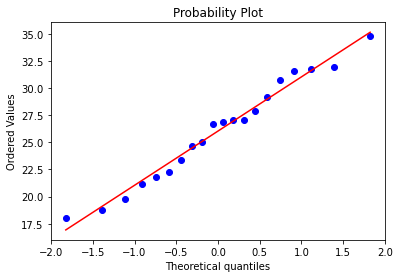

In [100]:
ldados = list(dados)
stats.probplot(dados.precipitacao, dist='norm', plot=plt);

[Voltar ao índice](#indice)

___
<div id="estimando-n"></div>

# Estimando o tamanho da amostra

Vamos aprender a estimar um tamanho da amostra com limite para o erro máximo da amostra com probabilidade $\gamma$. Lembrando que $\gamma$ é o complemento do nível de significância, ou seja, $\gamma = 1 - \alpha$.

Vamos lembrar da expressão que calcula o tamanho da amostra:

$$n = \left(\frac{z\sigma}{\varepsilon} \right)^2$$


___
<div id="calc_n"></div>

## EXERCÍCIO: Cálculo de *n*:

Uma fábrica de mantas de chumbo para proteção em radiografias precisa garantir que suas mantas têm uma certa espessura. Sabe-se que o desvio padrão populacional é de $0.6mm$.

Qual o tamanho da amostra é preciso ter para garantir que a média amostral $\overline{x}$ esteja a uma distância máxima de $0.2mm$ da média $\mu$? Considere 1% de significância.

*Valores de referência para a resposta: z = 2.5758293035489004 , n = 60*

In [108]:
sig = 0.6
z = stats.norm.ppf(0.995)
z

2.5758293035489004

In [110]:
n = (z*sig/0.2)**2
int(n+1)

60

[Voltar ao índice](#indice)